# Load BTC data

                       open   close    high     low     volume
2013-04-01 00:07:00   93.25   93.30   93.30   93.25  93.300000
2013-04-01 00:08:00  100.00  100.00  100.00  100.00  93.300000
2013-04-01 00:09:00   93.30   93.30   93.30   93.30  33.676862
2013-04-01 00:10:00   93.30   93.30   93.30   93.30   0.000000
2013-04-01 00:11:00   93.35   93.47   93.47   93.35  20.000000
                        open    close     high      low    volume
2023-10-08 09:24:00  27927.0  27927.0  27927.0  27927.0  0.000000
2023-10-08 09:25:00  27927.0  27927.0  27927.0  27927.0  0.000000
2023-10-08 09:26:00  27927.0  27927.0  27927.0  27927.0  0.000000
2023-10-08 09:27:00  27927.0  27927.0  27927.0  27927.0  0.000000
2023-10-08 09:28:00  27912.0  27912.0  27912.0  27912.0  0.000442


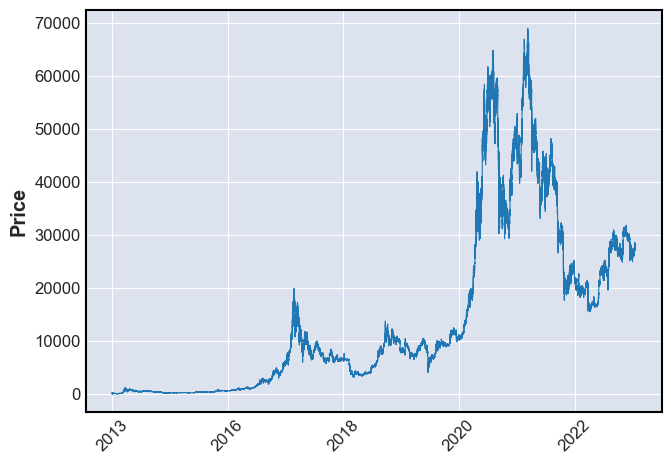

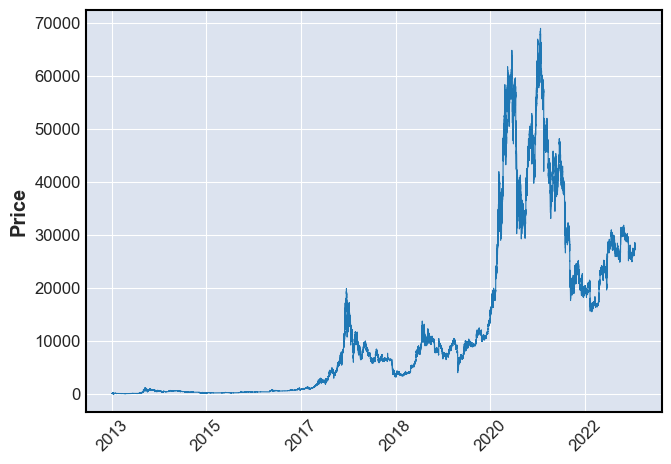

In [2]:
import pandas as pd
import mplfinance as mpf

def load_and_fill_in_gaps():
    df_og = pd.read_csv('data/btcusd.csv', index_col="time")
    df_og.index = pd.to_datetime(df_og.index,unit='ms')
    
    # df.resample('1min').fillna()
    all_times = pd.date_range(start=df_og.index.min(), end=df_og.index.max(), freq="1min")
    df = df_og.reindex(all_times)
    
    # Forward-fill the 'Close' column
    df['close'] = df['close'].ffill()
    
    # Copy the forward-filled 'Close' value to 'Open', 'High', and 'Low'
    df['open'] = df['open'].combine_first(df['close'])
    df['high'] = df['high'].combine_first(df['close'])
    df['low'] = df['low'].combine_first(df['close'])
    
    # Set 'Volume' to 0 for the newly created rows
    df['volume'] = df['volume'].fillna(0)
    
    print(df.head(5))
    print(df.tail(5))
    
    mpf.plot(df_og, type='line', datetime_format='%Y')
    mpf.plot(df, type='line', datetime_format='%Y')

    return df



# Normalize the data


## Normalize volume

                       open   close    high     low    volume
2013-04-01 00:07:00   93.25   93.30   93.30   93.25  2.502149
2013-04-01 00:08:00  100.00  100.00  100.00  100.00  2.502149
2013-04-01 00:09:00   93.30   93.30   93.30   93.30  1.758977
2013-04-01 00:10:00   93.30   93.30   93.30   93.30 -0.875289
2013-04-01 00:11:00   93.35   93.47   93.47   93.35  1.386391 open      0.010000
close     1.060000
high      1.060000
low       0.010000
volume   -0.875289
dtype: float64 open      68925.000000
close     68925.000000
high      68958.000000
low       68734.000000
volume        5.725743
dtype: float64


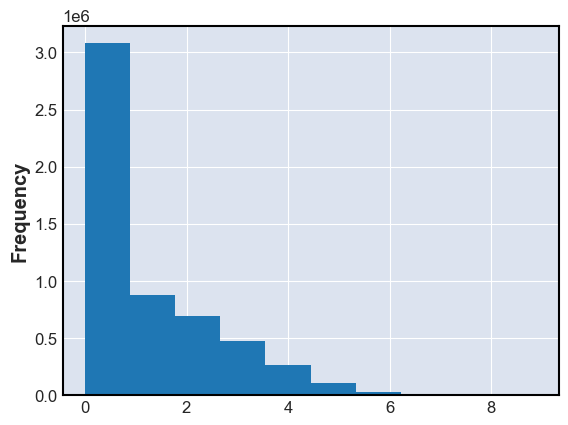

In [3]:
import numpy as np

def normalize_volume(df):
    df_norm = df.copy()
    df_norm['volume'] = np.log(np.add(df_norm['volume'], 1))
    
    df_norm['volume'].plot.hist()
    
    df_norm['volume'] = (df_norm['volume'] - df_norm['volume'].mean()) / df_norm['volume'].std()
    
    print(df_norm.head(5), df_norm.min(), df_norm.max())
    return df_norm

## Normalize OHLC

(22132168,)
11.14126740407234 0.009950330853168092 8.135346188400915 1.9180121525920217
68925.0 68925.0 68958.0 68734.0


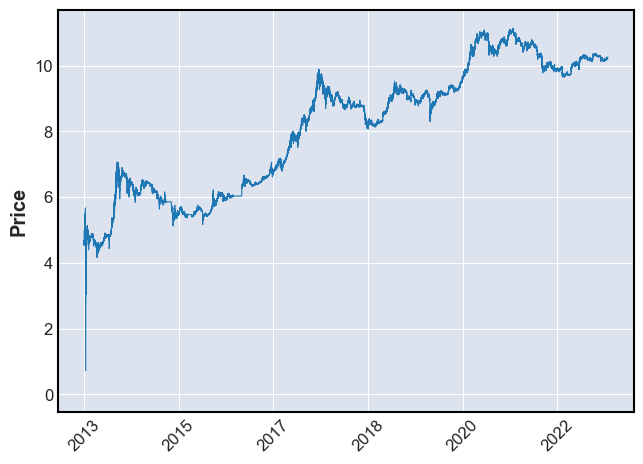

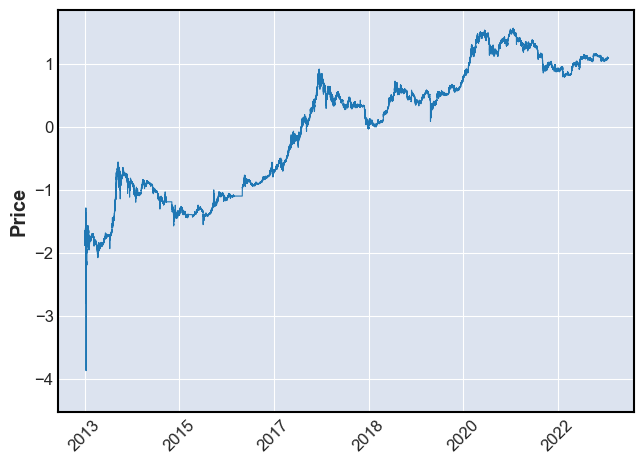

In [4]:
def normalize_prices(df_norm):
    columns_combined = pd.concat([df_norm['open'], df_norm['high'], df_norm['low'], df_norm['close']])
    print(columns_combined.shape)
    
    columns_combined_log = np.log(np.add(columns_combined, 1))
    print(columns_combined_log.max(), columns_combined_log.min(), columns_combined_log.mean(), columns_combined_log.std())
    print(
    df_norm['open'].max(),
    df_norm['close'].max(),
    df_norm['high'].max(),
    df_norm['low'].max())
    
    columns = ['open', 'high', 'low', 'close']
    for column in columns:
        df_norm[column] = np.log(np.add(df_norm[column], 1))
    mpf.plot(df_norm, type='line', datetime_format='%Y')
    
    for column in columns:
        df_norm[column] = (df_norm[column] - df_norm[column].mean()) / df_norm[column].std()
    
    mpf.plot(df_norm, type='line', datetime_format='%Y')

    return df_norm


In [ ]:
def main():
    df = load_and_fill_in_gaps()
    df_norm = normalize_volume(df)
    df_norm = normalize_prices(df_norm)
    return df_norm
df_norm = main()